In [11]:
##### Load packages #####
library(tidyverse)
library(multcomp)
library(ggplot2)
library(car)
library(MASS)
library(stats)
library(sjPlot)
library(tidyverse)
library(lme4)
library(lmerTest)
library(LMERConvenienceFunctions)
library(multcomp)

In [12]:
# Load CSV
dir_name <- basename(getwd())
csv_file <- paste0(dir_name, ".csv")
graphdata <- read.csv(csv_file)

Trial_list <- c("Trial01", "Trial02", "Trial03", "Trial04", "Trial05", "Trial06", "Trial07", "Trial08", "Trial09", "Trial10")

#add column index
colnames(graphdata) <- paste0(sprintf("%02d", seq_along(colnames(graphdata))), " ", colnames(graphdata))

# Identify rows with NA (used to detect the gaps) in graphdata
gap_rows <- which(rowSums(is.na(graphdata)) == ncol(graphdata))

# Assign groups dynamically using Trial_list
graphdata$Group <- NA  # Initialize Group column

# Create a sequence of rows to handle gaps
gap_rows <- c(0, gap_rows, nrow(graphdata) + 1)  # Include start and end boundaries
current_trial_index <- 1  # Start from the first trial in Trial_list

# Assign groups dynamically
for (i in seq_along(gap_rows[-1])) {
  start <- gap_rows[i] + 1  # Start of the current block
  end <- gap_rows[i + 1] - 1  # End of the current block
  
  if (start <= end) {
    graphdata$Group[start:end] <- Trial_list[current_trial_index]
    current_trial_index <- current_trial_index + 1
    
    # Loop back to the start of Trial_list if necessary
    if (current_trial_index > length(Trial_list)) {
      current_trial_index <- 1
    }
  }
}

# Print the result to check
print(head(graphdata))

# Reshape graphdata to long format and keep Group in the third column
stacked_graphdata <- graphdata %>%
  pivot_longer(cols = -Group,  # Exclude the Group column from pivoting
               names_to = "ind",  # Column names will go to 'ind'
               values_to = "values") %>%  # Data will go to 'values'
  relocate(Group, .after = ind)  # Move Group column to the third position

# View the result
print(head(stacked_graphdata))

# Create the tallcsv dataframe with renamed columns
tallcsv <- stacked_graphdata %>%
  rename(
    VALUE = values,       
    Treatment = ind,      
    Trial = Group         
  ) %>%
  arrange(Trial, Treatment)  

# View the resulting dataframe
print(head(tallcsv))

#delete NA row
tallcsv2 <- tallcsv[!is.na(tallcsv$VALUE),]

#export
csv_file2 <- paste0(dir_name, "_tall.csv")
write.csv(tallcsv2,csv_file2, row.names = FALSE)

   01 wt_0h 02 wt_2h 03 arm3b.23_0h 04 arm3b.23_2h 05 arm3b.33_0h
1 1.3164627 14.27118      0.9816859       14.13989             NA
2 0.8991705 13.88093      1.2085971       14.84288             NA
3 0.8447912 14.77445      0.8428415       13.94523             NA
4 0.8141313 14.17485             NA             NA      1.3723673
5 1.1837245 13.78724             NA             NA      0.8745827
6 1.0376597 12.95342             NA             NA      0.8331607
  06 arm3b.33_2h 07 flg22_0h 08 flg22_2h   Group
1             NA   0.9681707    82.80807 Trial01
2             NA   0.8970954    79.43481 Trial01
3             NA   1.1513555    85.13612 Trial01
4       13.25619   0.8625420    93.61026 Trial01
5       13.25619   1.0917683    90.42155 Trial01
6       12.71619   1.0619138    88.56070 Trial01
# A tibble: 6 × 3
  ind            Group   values
  <chr>          <chr>    <dbl>
1 01 wt_0h       Trial01  1.32 
2 02 wt_2h       Trial01 14.3  
3 03 arm3b.23_0h Trial01  0.982
4 04 arm3b.23_2h 

# A tibble: 6 × 3
  Treatment Trial   VALUE
  <chr>     <chr>   <dbl>
1 01 wt_0h  Trial01 1.32 
2 01 wt_0h  Trial01 0.899
3 01 wt_0h  Trial01 0.845
4 01 wt_0h  Trial01 0.814
5 01 wt_0h  Trial01 1.18 
6 01 wt_0h  Trial01 1.04 


[1] 34 35

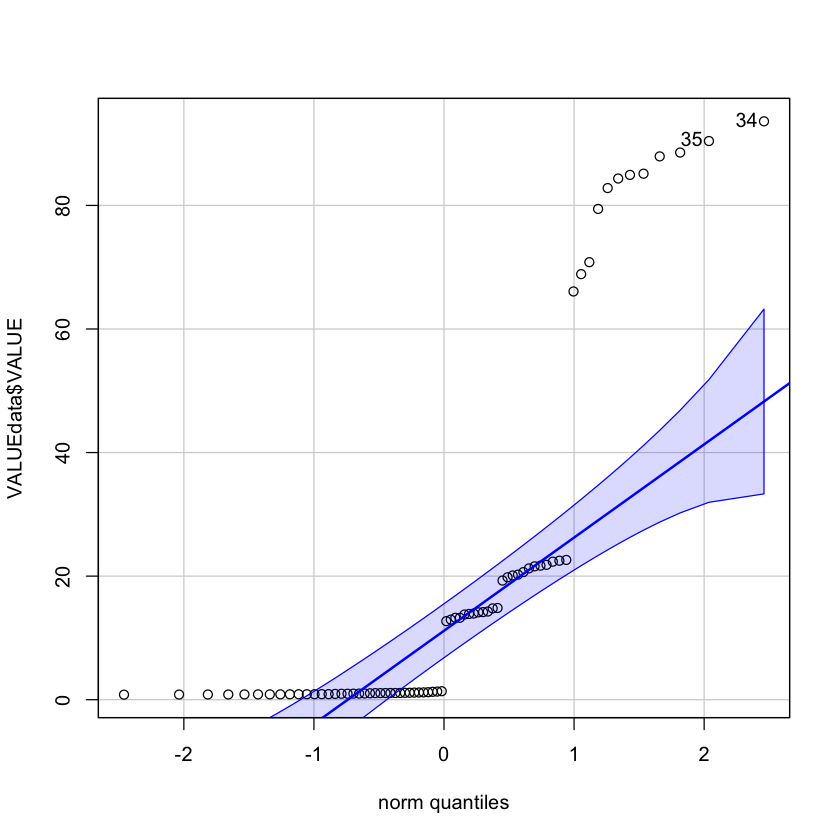

In [13]:
#VALUEdata=read.csv(choose.files())
VALUEdata <- tallcsv2
VALUEdata$VALUE <- as.numeric(as.character(VALUEdata$VALUE))
print(head(VALUEdata))
#Normal distribution
qqp(VALUEdata$VALUE, "norm")

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')



Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: VALUE ~ Treatment + (1 | Trial)
   Data: VALUEdata

     AIC      BIC   logLik deviance df.resid 
   427.1    449.9   -203.6    407.1       62 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.8744 -0.0420  0.0025  0.4780  2.8607 

Random effects:
 Groups   Name        Variance Std.Dev.
 Trial    (Intercept)  0.00    0.000   
 Residual             16.72    4.089   
Number of obs: 72, groups:  Trial, 2

Fixed effects:
                         Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)              1.013327   1.180316 72.000000   0.859    0.393    
Treatment02 wt_2h       16.477675   1.669218 72.000000   9.871 5.09e-15 ***
Treatment03 arm3b.23_0h -0.004882   2.044367 72.000000  -0.002    0.998    
Treatment04 arm3b.23_2h 17.068136   2.044367 72.000000   8.349 3.42e-12 ***
Treatment05 arm3b.33_0h  0.001493   2.044367 72.000000   0.001    0.999  

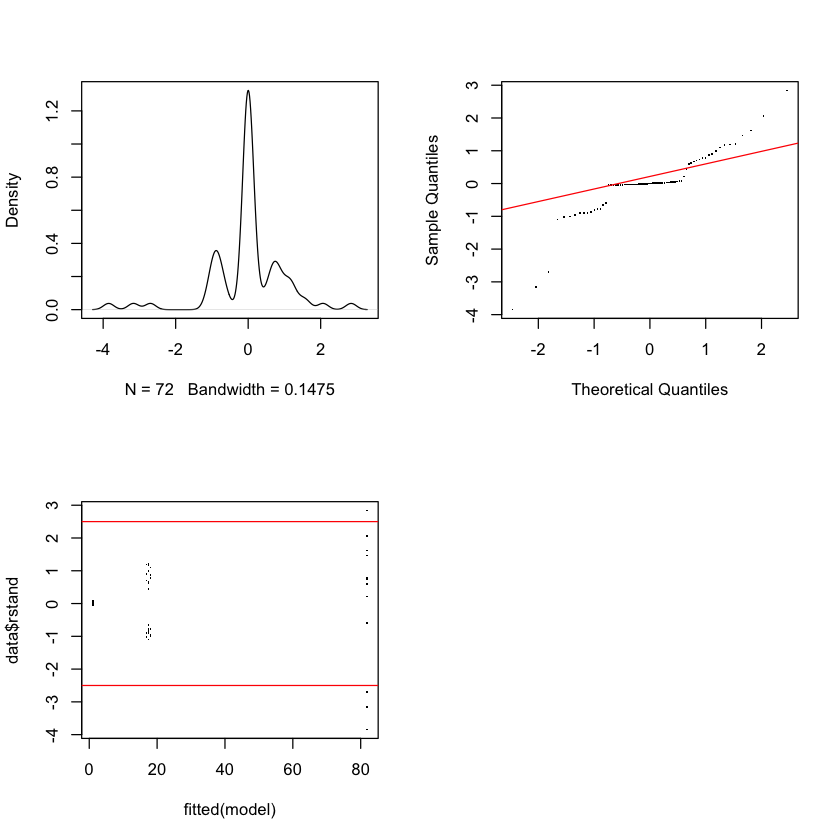

In [14]:
#set REML to FALSE if the data is normal, so we can use the maximum likelihood because the data are normal, we have similar sample sizes between effects, and we only have one random effect
VALUE.lmm<-lmer(VALUE ~ Treatment + (1|Trial), data = VALUEdata, REML = FALSE)
m<-lmer(VALUE ~ Treatment + (1|Trial), data = VALUEdata, REML = FALSE)
#the density plot should look roughly normal, centered on 0. In the quantile plot the black dots should roughly mirror the red line. And in the fitted residual plot most black dots should be between the red lines, with no obvious skew from left to right.
mcp.fnc(VALUE.lmm)
#If the above looks good, then we can get the model characteristics
summary(VALUE.lmm)
summary_name1 <- paste0("01.",dir_name, "_LMM_summary.txt")
capture.output(summary(VALUE.lmm), file = summary_name1)

In [15]:
#anova analysis of lmm
aov <- anova(m)
print(summary(aov))
# Save the summary to a text file
summary_name2 <- paste0("02.",dir_name, "_anova_summary.txt")
capture.output(summary(aov), file = summary_name2)

#Tukey's post-hoc, load library multcomp
tukey_result <- glht(m, linfct = mcp(Treatment = "Tukey"))
multcomps <- cld(tukey_result, alpha=0.1)
print(summary(tukey_result))
# Save the summary to a text file
summary_name3 <- paste0("03.",dir_name, "_multcomp_summary.txt")
capture.output(summary(tukey_result), file = summary_name3)

print(multcomps)
multcomp_name <- paste0("04.",dir_name, "_multcomp_letters.txt")
capture.output(print(multcomps), file = multcomp_name)

     Sum Sq         Mean Sq         NumDF       DenDF       F value     
 Min.   :59136   Min.   :8448   Min.   :7   Min.   :72   Min.   :505.3  
 1st Qu.:59136   1st Qu.:8448   1st Qu.:7   1st Qu.:72   1st Qu.:505.3  
 Median :59136   Median :8448   Median :7   Median :72   Median :505.3  
 Mean   :59136   Mean   :8448   Mean   :7   Mean   :72   Mean   :505.3  
 3rd Qu.:59136   3rd Qu.:8448   3rd Qu.:7   3rd Qu.:72   3rd Qu.:505.3  
 Max.   :59136   Max.   :8448   Max.   :7   Max.   :72   Max.   :505.3  
     Pr(>F)        
 Min.   :1.57e-58  
 1st Qu.:1.57e-58  
 Median :1.57e-58  
 Mean   :1.57e-58  
 3rd Qu.:1.57e-58  
 Max.   :1.57e-58  

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lmer(formula = VALUE ~ Treatment + (1 | Trial), data = VALUEdata, 
    REML = FALSE)

Linear Hypotheses:
                                       Estimate Std. Error z value Pr(>|z|)    
02 wt_2h - 01 wt_0h == 0              16.477675   1.66921